# Repaso - Módulo 2

## Problema 1. Simulación Montecarlo usando Caminata aleatoria

Se desea conocer el estado final de un proceso hipotético definido como una Máquina de estados. Este proceso cuenta con los estados: **A** y **B**. El proceso se define de la siguiente manera:
* Estando en el estado **A**, 4 de cada 7 operaciones cambia al estado **B**, el resto de casos se mantiene en el estado **A**.
* Estando en el estado **B**, 1 de cada 3 operaciones cambia al estado **A**, el resto de casos se mantiene en el estado **B**.

Respresentado por el siguiente diagrama

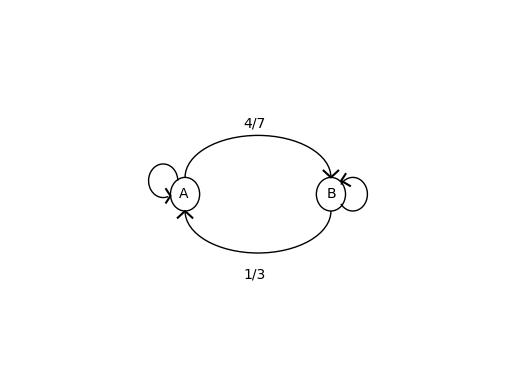

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

C1 = patches.Circle((-0.5, 0), 0.1,fc='None',color='k')
C2 = patches.Circle((0.5, 0), 0.1,fc='None',color='k')
B1 = patches.Arc((0, 0.1), 1,0.5,theta2=180,fc='None',color='k')
B2 = patches.Arc((0, -0.1), 1,0.5,theta1=180,fc='None',color='k')
A1 = patches.Arc((-0.65, 0.08), 0.2,0.2,theta2=290,fc='None',color='k')
A2 = patches.Arc((0.65, 0), 0.2,0.2,theta1=-145,theta2=145,fc='None',color='k')
ax = plt.gca()
ax.add_artist(B1)
ax.add_artist(B2)
ax.add_artist(C1)
ax.add_artist(C2)
ax.add_artist(A1)
ax.add_artist(A2)

plt.plot([0.45,0.5,0.55],[0.14,0.1,0.14],'k')
plt.plot([-0.45,-0.5,-0.55],[-0.14,-0.1,-0.14],'k')
plt.plot([-0.63,-0.6,-0.63],[0.03,-0.01,-0.05],'k')
plt.plot([0.63,0.57,0.6],[0.05,0.08,0.12],'k')

plt.text(-0.54,-0.02,'A')
plt.text(0.47,-0.02,'B')
plt.text(-0.1,0.4,'4/7')
plt.text(-0.1,-0.5,'1/3')

plt.axis([-1.7,1.7,-1.1,1.1])
plt.axis('off')
plt.show()

* Si el proceso parte del estado **A**, y se ejecutan 50 operaciones, ¿Cuál es la probabilidad de que el proceso finalice en el estado **B**? Usando el método Montecarlo con 100000 escenarios.

---
## Problema 2. Simulación de escenarios futuros

Evaluaremos dos compañías con tendencias más o menos similares (Apple y Microsoft) veremos cuál tiene más probabilidades de darnos un interés deseado.

Además, descargaremos los datos del año 2025 para ver si el análisis concuerda.

Descargue datos para Apple y Microsoft desde enero de 2015 a diciembre de 2024 y muestre sus gráficas.

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf

/tmp/ipython-input-3001625138.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data=yf.download(tickers,start='2015-01-01',end='2024-12-31')['Close']
[*********************100%***********************]  2 of 2 completed


<Axes: xlabel='Date'>

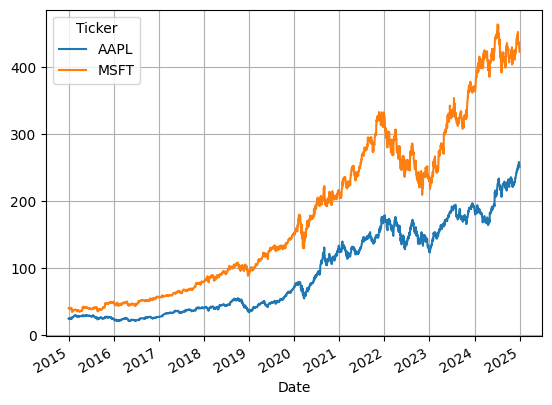

In [2]:
# AAPL -> Apple
# MSFT -> Microsoft
tickers=['AAPL','MSFT']
data=yf.download(tickers,start='2015-01-01',end='2024-12-31')['Close']
data.plot(grid=True)

Calcule los rendimientos diarios junto con sus características estadísticas

<Axes: xlabel='Date'>

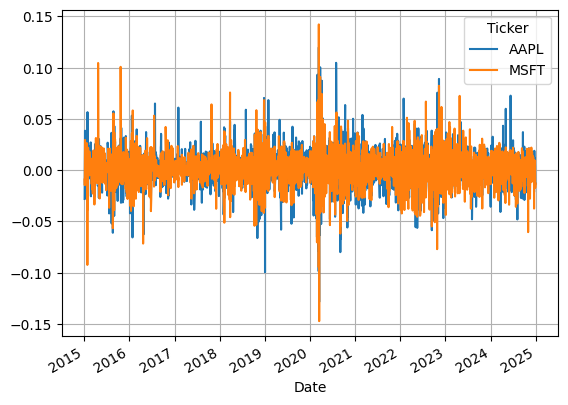

In [3]:
#Rendimientos diarios
delta=data.pct_change().dropna()
delta.plot(grid=True)

In [4]:
#Veo que son constantes

array([[<Axes: title={'center': 'AAPL'}>,
        <Axes: title={'center': 'MSFT'}>]], dtype=object)

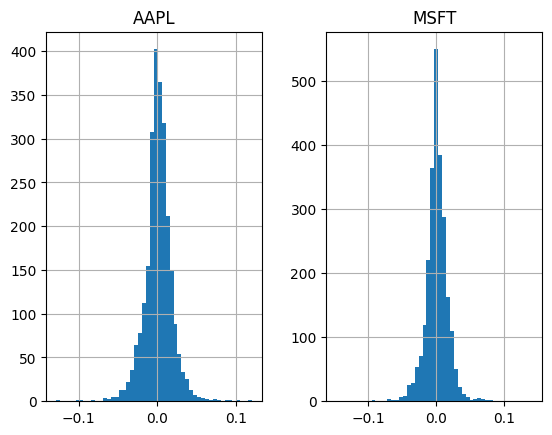

In [5]:
#Histogramas
delta.hist(bins=50,grid=True)

In [6]:
#Veo que son normales

Simule 10000 escenarios de rendimientos diarios para todo el año 2025 (para cada una de las empresas).

In [7]:
def simulacion(delta,marca,N_dias,N_escenarios):
  delta_marca=np.random.normal(delta[marca].mean(),delta[marca].std(),(N_dias,N_escenarios))
  rango_tiempo=pd.date_range('2025-01-01',periods=N_dias)
  delta_marca=pd.DataFrame(delta_marca,index=rango_tiempo)
  return delta_marca

In [11]:
#Simulación Apple
simulacion(delta,'AAPL',365,10000)

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
2025-01-01,-0.002654,0.005084,-0.003108,0.020698,-0.025421,-0.022077,-0.030368,0.020308,0.045285,-0.003388,...,0.010293,-0.025879,-0.010838,-0.023322,0.029218,0.027676,-0.026594,0.006687,0.007846,-0.008067
2025-01-02,-0.005633,0.005609,0.016564,0.024257,0.007000,-0.004176,0.004184,0.013285,-0.001148,0.016918,...,-0.000409,0.019426,-0.004903,0.007403,0.021064,0.024636,0.018308,-0.004953,-0.025060,-0.018109
2025-01-03,-0.012577,-0.012914,0.005670,-0.022255,0.008808,0.020048,-0.058047,-0.048703,-0.015596,-0.028520,...,0.008130,0.001188,-0.003195,0.012773,-0.018283,0.005307,0.007820,0.023309,0.015051,-0.006238
2025-01-04,-0.013710,-0.019610,-0.005657,0.016397,-0.000414,-0.013959,-0.020791,-0.019340,0.024164,-0.000126,...,0.001407,0.036937,0.028030,0.015883,-0.006157,-0.008448,0.003532,-0.006504,-0.010297,-0.004441
2025-01-05,0.021388,-0.002279,-0.002856,-0.010925,-0.020768,-0.024913,-0.022330,-0.021628,-0.007468,0.024380,...,0.021225,0.001164,-0.040000,-0.010673,0.020360,-0.003974,-0.010740,0.018219,-0.008426,-0.019744
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-12-27,-0.016705,-0.018505,-0.037576,-0.022720,0.024653,-0.018557,-0.052362,0.017677,-0.017301,-0.019377,...,0.020132,-0.025377,-0.002673,0.036935,0.013482,0.013776,0.011003,-0.017155,-0.002472,-0.019380
2025-12-28,-0.013280,-0.002125,-0.003853,-0.008591,-0.026531,-0.030580,0.034280,-0.018966,-0.002403,0.017058,...,-0.016203,0.005659,-0.020354,0.010033,0.015449,-0.013723,-0.009527,-0.029387,0.011814,-0.010075
2025-12-29,-0.006905,-0.006351,0.013541,-0.018872,-0.005413,-0.003054,0.021226,0.012936,0.021241,0.011177,...,0.003377,0.001378,-0.005472,0.015650,-0.013279,-0.016951,-0.004622,-0.001013,-0.000686,-0.021821
2025-12-30,0.016575,0.028553,0.023686,0.002772,-0.017010,0.007572,0.010111,-0.031176,0.012394,-0.020184,...,0.032223,-0.022081,-0.014143,-0.010139,0.023860,0.002050,0.036064,0.009216,-0.016312,0.019414


In [12]:
#Microsoft:
simulacion(delta,'MSFT',365,10000)

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
2025-01-01,-0.002445,-0.037155,0.028283,-0.001259,0.006134,-0.006004,0.012044,0.015222,0.014882,-0.009613,...,-0.007496,0.016637,-0.001961,0.008350,0.001078,0.005809,0.006759,-0.020507,-0.008262,-0.012004
2025-01-02,0.003662,0.017159,-0.015148,-0.000172,0.025058,-0.014218,0.015623,0.025700,-0.028527,-0.013572,...,-0.010730,0.010510,0.003047,0.038957,-0.000953,0.016231,0.035137,0.024513,0.035747,0.024259
2025-01-03,0.013215,-0.015234,-0.001044,0.030201,-0.022015,-0.000918,0.019975,-0.022770,0.012528,0.016567,...,-0.020836,0.026225,-0.007840,-0.007197,0.007900,0.004896,0.019940,-0.017710,-0.008584,-0.011516
2025-01-04,0.013606,0.018950,-0.002181,0.012205,-0.006571,0.001909,-0.003581,0.010225,-0.011378,-0.004912,...,-0.008974,0.008974,0.005186,-0.019935,0.007143,0.007811,-0.045549,0.009696,0.002084,-0.007001
2025-01-05,-0.006032,-0.010753,0.014586,0.015654,0.001469,-0.022895,-0.002423,0.017886,0.016464,0.012309,...,-0.008848,0.006919,-0.000256,0.009321,-0.053674,-0.001699,-0.003595,0.015069,0.016765,0.014925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-12-27,-0.022117,0.002926,-0.002948,-0.006965,-0.031320,0.014311,0.004797,-0.011049,-0.001671,-0.004815,...,-0.019517,0.012146,0.028880,-0.004585,0.033493,-0.003162,-0.028210,0.003715,0.007820,-0.009291
2025-12-28,-0.004684,0.015130,-0.004619,-0.000863,-0.001827,0.007409,0.012371,-0.009191,-0.026864,-0.000952,...,-0.019634,0.013558,0.025557,-0.013184,0.004617,0.028305,-0.000433,-0.000360,-0.020338,0.017371
2025-12-29,0.015570,-0.021397,0.013954,-0.000868,0.018935,0.006967,-0.008221,0.001597,0.012296,0.016861,...,0.016629,0.001347,0.003357,0.007611,-0.020317,0.010492,0.015448,0.000016,-0.000150,-0.010798
2025-12-30,0.001545,0.021692,-0.002461,0.000204,-0.009145,-0.016822,-0.011782,0.014782,0.009811,-0.015280,...,-0.003961,0.014219,0.010222,0.018426,0.005698,0.009964,-0.019296,-0.005220,0.020078,-0.019875


Calcule los precios con base en los rendimientos simulados

In [13]:
def precios(delta,marca,N_dias,N_escenarios):
  delta_marca=simulacion(delta,marca,N_dias,N_escenarios)
  precios_marca=data[marca].iloc[-1]*(delta_marca+1).cumprod()
  return precios_marca

In [15]:
#Precios Apple:
precios(delta,'AAPL',365,10000)

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
2025-01-01,259.666263,252.108703,253.261180,243.994950,254.613456,251.600210,246.010132,251.658420,247.828968,249.595007,...,253.994194,252.837506,257.781605,248.870429,250.573640,255.630198,241.043837,249.554643,254.817015,256.468722
2025-01-02,261.215618,246.881577,250.703224,248.069983,256.657731,258.413950,243.741482,250.377139,241.387828,248.244936,...,255.628492,254.394008,262.346784,254.954535,243.622469,251.906041,238.844090,252.997009,252.312709,266.168486
2025-01-03,263.759337,251.051688,248.578391,243.649123,250.711635,251.128981,249.319492,248.528676,232.810473,248.057539,...,254.020655,254.774823,255.751932,253.680284,244.832357,253.588004,235.701073,260.101746,248.092341,273.168705
2025-01-04,261.623846,257.734950,241.920067,247.193396,243.243847,243.847174,244.845159,253.884558,234.938557,248.752371,...,260.491925,252.445437,260.330154,247.673240,243.226540,264.640570,238.642749,257.759418,242.781662,277.626446
2025-01-05,253.627867,253.750488,241.520464,247.560589,249.447698,246.227817,244.562023,250.704888,235.197480,246.839950,...,267.781862,254.973748,263.573242,252.711159,247.429873,267.865687,239.414048,252.647277,243.826224,281.497740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-12-27,291.905945,268.909396,193.951218,203.268212,429.257538,175.972605,247.236703,371.441316,356.524443,418.008842,...,485.001735,244.620029,405.387095,431.409722,353.826462,226.543357,341.581858,303.733046,469.323771,390.418975
2025-12-28,293.623993,270.169783,192.757972,201.740531,430.442615,173.855235,246.806837,363.811695,359.215437,418.355000,...,478.259892,240.904403,406.488651,430.705676,360.063615,222.499051,347.613472,297.596245,473.930349,385.270566
2025-12-29,291.826533,274.057272,198.868304,197.599281,433.745958,177.571072,244.433143,354.473664,353.572984,413.031372,...,471.978117,244.144394,400.006949,429.068601,364.976680,219.510811,342.210398,295.267881,475.308070,398.451299
2025-12-30,293.902220,272.903177,204.399113,195.494118,452.196385,181.200778,245.025049,350.452450,349.300895,420.451936,...,457.665262,238.658237,404.242494,440.382170,359.080940,221.163255,347.138181,295.200141,462.892176,386.966393


In [16]:
#Precios Microsoft
precios(delta,'MSFT',365,10000)

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
2025-01-01,425.747375,420.510151,426.617436,430.635633,427.095424,426.854380,430.733785,432.051384,419.224285,420.265833,...,430.008858,427.581546,413.071261,426.997192,428.524857,435.751156,422.848263,429.369572,414.645335,437.087235
2025-01-02,421.565689,426.518141,432.565760,428.709585,437.058333,418.170448,421.104377,453.824674,419.058362,419.192532,...,416.080152,429.402846,419.812480,428.895254,433.663389,432.031457,415.770907,427.127927,407.552902,451.131122
2025-01-03,426.328566,425.325709,430.347528,429.268289,443.309814,420.887439,412.982214,439.247949,413.298359,419.946876,...,414.973684,423.305747,417.673892,425.505161,422.282218,434.783732,417.255432,434.284121,409.454210,452.188354
2025-01-04,426.287841,419.310155,441.841176,433.827867,450.877420,418.671692,407.682882,451.051609,419.847711,417.580345,...,425.554631,418.923687,412.821832,429.801304,417.494991,437.818497,399.832379,428.909689,411.474588,461.982078
2025-01-05,418.500176,418.770983,439.781482,429.173780,444.648127,420.455682,405.569164,444.818375,418.914524,410.115294,...,426.198524,418.872942,412.827818,429.949485,415.627889,438.144724,417.492806,431.815563,414.200668,455.536494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-12-27,636.677456,575.689887,1008.383650,883.496338,851.758059,699.608908,460.689927,651.227262,513.619544,470.370211,...,511.364821,515.328529,1353.716764,1460.721648,592.658728,708.731807,469.537158,840.673064,676.273028,712.751802
2025-12-28,636.642698,581.033466,994.605479,893.194689,865.036119,709.611404,446.243635,652.749434,511.433206,459.882535,...,527.936388,512.520152,1336.616030,1505.205328,583.983479,679.146851,481.222177,838.365138,673.885690,719.575814
2025-12-29,624.498290,581.919218,982.680160,927.819792,862.498380,707.073820,439.639253,653.239011,518.762927,460.667278,...,540.446984,522.786835,1311.287182,1529.280623,600.163911,681.628817,483.972634,838.889829,680.993405,703.187350
2025-12-30,620.789838,585.342915,1003.589696,934.072774,872.458924,703.848925,455.258835,646.756818,514.014825,459.887110,...,546.368675,540.170671,1313.319639,1511.045250,603.529031,695.473734,476.136930,874.203610,705.653849,706.501951


Calcule la probabilidad de obtener un retorno del 20% para ambas marcas.

In [18]:
def ProbPorc(delta,marca,N_dias,N_escenarios,porc):
  precios_marca=precios(delta,marca,N_dias,N_escenarios)
  # B=Cuántos escenarios satisfacen la condición buscada:
  B_marca=precios_marca>data[marca].iloc[-1]*(1+porc/100)
  proba_marca=B_marca.mean(axis=1)
  return proba_marca.plot(grid=True)

<Axes: >

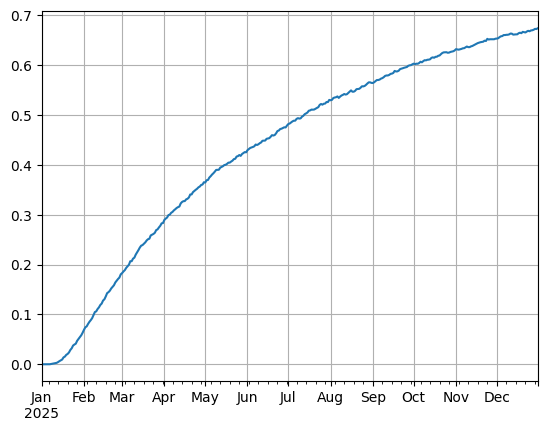

In [21]:
ProbPorc(delta,'AAPL',365,10000,20)

<Axes: >

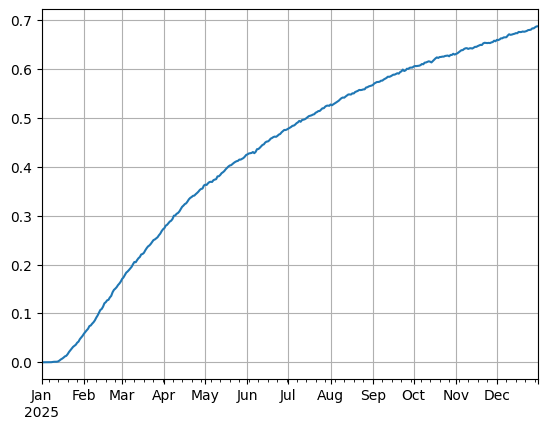

In [22]:
ProbPorc(delta,'MSFT',365,10000,20)

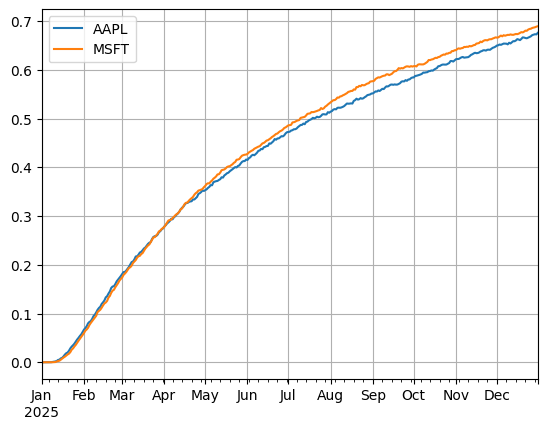

In [25]:
def simulacion(data,ticker,dia_inicial,N_dias,N_escenarios):
  delta=data.pct_change().dropna()
  delta_sim=np.random.normal(delta[ticker].mean(),delta[ticker].std(),(N_dias,N_escenarios))
  rango_tiempo=pd.date_range(dia_inicial,periods=N_dias)
  delta_sim=pd.DataFrame(delta_sim,index=rango_tiempo)
  precios_simulados=data[ticker].iloc[-1]*((delta_sim+1).cumprod())
  B=precios_simulados>data[ticker].iloc[-1]*1.2
  return B.mean(axis=1)

simulacion(data,'AAPL','2025-01-01',365,10000).plot(grid=True,label='AAPL').legend()
simulacion(data,'MSFT','2025-01-01',365,10000).plot(grid=True,label='MSFT').legend()

Existe casi un 70% de probabilidad en ambas marcas de que alcancen un retorno del 20% en un año.

Finalmente, grafique los datos reales del 2025 para ver que tan acertado fue nuestro análisis.

/tmp/ipython-input-2002380910.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data=yf.download(tickers,start='2025-01-01',end='2025-12-31')['Close']
[*********************100%***********************]  2 of 2 completed


<Axes: xlabel='Date'>

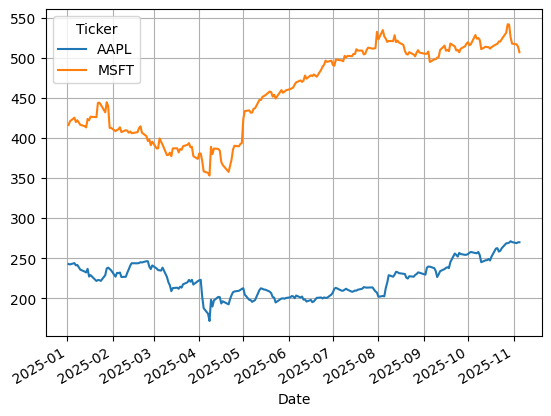

In [26]:
data=yf.download(tickers,start='2025-01-01',end='2025-12-31')['Close']
data.plot(grid=True)